# Day 1: Data Understanding and Initial Exploration


## Import Libraries

Essential Python libraries are imported for data manipulation,
visualization, and numerical operations. These libraries will be
used throughout the project.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

## Load Dataset

The House Prices dataset is loaded from Kaggle. The training dataset
contains the target variable `SalePrice`, while the test dataset
is used later for prediction.


In [2]:
train_df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train (1).csv')
test_df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test (1).csv')

## Dataset Shape

Checking the number of rows and columns helps understand the size
of the dataset and confirms successful loading.


In [3]:
train_df.shape

(1460, 81)

In [4]:
test_df.shape

(1459, 80)

## Preview Data

Displaying the first few rows helps identify feature types,
target variable, and overall structure of the dataset.


In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Target Variable: SalePrice

The target variable represents the final selling price of each house.
Descriptive statistics help understand its distribution and scale.


In [6]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Distribution of SalePrice

Visualizing the distribution of house prices helps detect skewness
and outliers, which are important considerations for regression models.


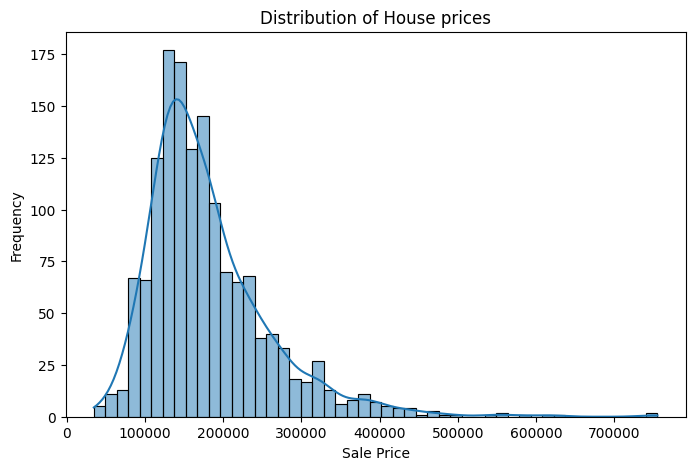

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(train_df['SalePrice'],kde=True)
plt.title('Distribution of House prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

## Missing Values

Identifying missing values is crucial for preprocessing.
Some missing values indicate the absence of certain house features
rather than data errors.


In [8]:
missing=train_df.isnull().sum()
missing=missing[missing>0].sort_values(ascending=False)
missing.head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
dtype: int64

## Data Types

Understanding data types helps identify numerical and categorical
features, which require different preprocessing techniques.


In [9]:
train_df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

## Initial Observations

- The dataset contains many categorical variables.
- Several features have missing values representing the absence
  of house attributes.
- The target variable is right-skewed.
- Feature engineering and preprocessing will be required before modeling.


## Day 1 Conclusion

The House Prices dataset contains a rich mixture of numerical and
categorical features with a right-skewed target variable. Several
features include missing values that often represent the absence
of certain house attributes rather than missing data. This stage
focused on understanding the dataset structure and identifying
preprocessing requirements for future steps.


In [10]:
num_features=train_df.select_dtypes(include=['float64','int64'])
cat_features=train_df.select_dtypes(include=['object'])
num_features.shape,cat_features.shape

((1460, 38), (1460, 43))

In [11]:
corr_matrix=num_features.corr()
saleprice_corr=corr_matrix['SalePrice'].sort_values(ascending=False)
saleprice_corr.head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

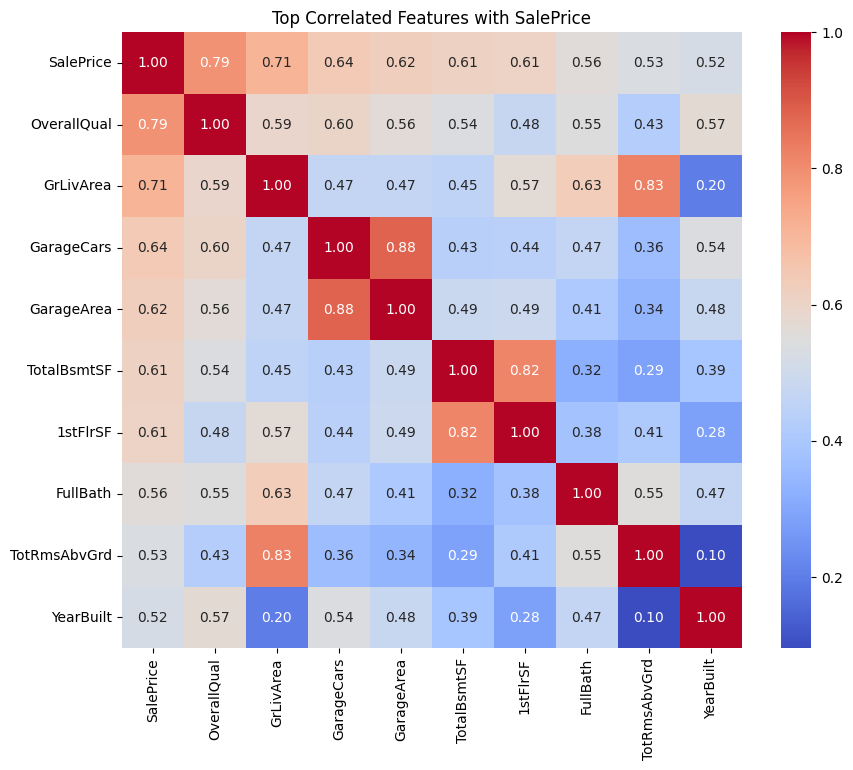

In [12]:
top_corr_features=saleprice_corr.index[:10]
plt.figure(figsize=(10,8))
sns.heatmap(num_features[top_corr_features].corr(),
           annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Top Correlated Features with SalePrice')
plt.show()

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

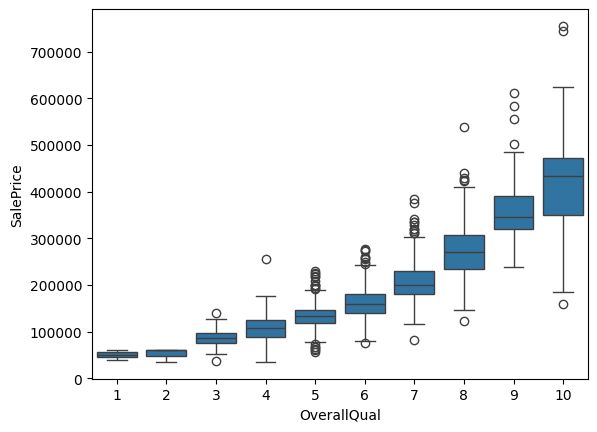

In [13]:
sns.boxplot(x='OverallQual',y='SalePrice',data=train_df)

# Day 3: Feature Engineering and Preprocessing


## Dropping Identifier Column

The Id column uniquely identifies each house but does not contain
predictive information. It is removed before modeling.


In [14]:
train_df.drop('Id',axis=1,inplace=True)
test_df.drop('Id',axis=1,inplace=True)

## Log Transformation of SalePrice

SalePrice is right-skewed. Applying a log transformation reduces skewness
and helps regression models learn patterns more effectively.


In [15]:
train_df['SalePrice']=np.log1p(train_df['SalePrice'])

## Separating Features and Target Variable


In [16]:
y=train_df['SalePrice']
x=train_df.drop('SalePrice',axis=1)

## Combining Train and Test Data

Train and test datasets are combined temporarily to ensure consistent
handling of missing values and categorical encoding.


In [17]:
all_data=pd.concat([x,test_df],axis=0)
all_data.shape

(2919, 79)

## Handling Missing Values

Missing values are handled based on domain knowledge. In many cases,
missing values indicate the absence of a house feature rather than
missing information.


In [18]:
none_cols=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish','GarageQual',
          'GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for col in none_cols:
    all_data[col]=all_data[col].fillna('None')

In [19]:
num_cols=all_data.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    all_data[col]=all_data[col].fillna(all_data[col].median)

## Encoding Categorical Variables

Categorical features are converted into numerical form using one-hot
encoding, allowing regression models to process them effectively.


In [20]:
all_data=pd.get_dummies(all_data)
all_data.shape

(2919, 5048)

## Splitting Data Back into Train and Test Sets


In [21]:
x_train=all_data.iloc[:len(y),:]
x_test=all_data.iloc[len(y):,:]

## Day 3 Conclusion

Feature engineering and preprocessing prepared the dataset for regression
modeling. The target variable was log-transformed, missing values were
handled using domain knowledge, and categorical variables were encoded.
The resulting dataset is clean, consistent, and ready for model training.


In [22]:
all_data.isnull().sum().max()


0

# Day 4: Regression Modeling and Evaluation


## Objective

The goal of Day 4 is to train multiple regression models on the prepared
dataset, evaluate their performance using RMSE, compare results, and
select a well-generalized model for final prediction.


### Train–Validation Split

The dataset is split into training and validation sets to evaluate
model performance on unseen data.


In [23]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(
    x_train,y,test_size=0.2,random_state=42
)

### Evaluation Metric: Root Mean Squared Error (RMSE)

RMSE is used as the evaluation metric for regression models. It measures
the average magnitude of prediction error and penalizes large errors
more heavily. RMSE is the official evaluation metric for the House
Prices Kaggle competition.


In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
    

### Baseline Model: Linear Regression

Linear Regression is used as a baseline model to establish a reference
performance. It assumes a linear relationship between features and the
target variable and helps determine whether more complex models are
necessary.


In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_tr,y_tr)
lr_pred=lr.predict(x_val)
lr_rmse=rmse(y_val,lr_pred)

### Ridge Regression (L2 Regularization)

Ridge Regression introduces L2 regularization to penalize large model
coefficients. This helps reduce overfitting and improves performance in
datasets with multicollinearity and high-dimensional feature spaces.


In [26]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1.0)
ridge.fit(x_tr,y_tr)
ridge_pred=ridge.predict(x_val)
ridge_rmse=rmse(y_val,ridge_pred)

### Lasso Regression (L1 Regularization)

Lasso Regression applies L1 regularization, which can shrink some
coefficients to zero. This effectively performs feature selection and
helps remove weak or redundant predictors from the model.


In [27]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.0005)
lasso.fit(x_tr,y_tr)
lasso_pred=lasso.predict(x_val)
lasso_rmse=rmse(y_val,lasso_pred)

### Random Forest Regressor

Random Forest is a tree-based ensemble model that captures non-linear
relationships and feature interactions. It serves as a comparison
against linear and regularized regression models.


In [28]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
rf.fit(x_tr,y_tr)
rf_pred=rf.predict(x_val)
rf_rmse=rmse(y_val,rf_pred)

### Cross-Validation

Cross-validation is performed on the selected model to confirm stability
and robustness across multiple data splits. This step reduces dependency
on a single train–validation split and provides a more reliable estimate
of model performance.


In [29]:
pd.DataFrame({
    'Model':['Linear Regression','Ridge','Lasso','Random Forest'],
    'RMSE':[lr_rmse,ridge_rmse,lasso_rmse,rf_rmse]
})

,Model,RMSE
0,Linear Regression,0.169816
1,Ridge,0.143295
2,Lasso,0.140919
3,Random Forest,0.147933


Linear Regression showed the highest RMSE, indicating overfitting and
sensitivity to correlated features. Regularized models significantly
improved performance, with Lasso achieving the lowest RMSE by performing
implicit feature selection. Random Forest captured non-linear patterns
but did not outperform regularized linear models for this dataset.


## Final Model Selection

Based on validation and cross-validation performance, Lasso Regression
is selected as the final model. It achieved the lowest RMSE while
maintaining simplicity and effective feature selection.


In [30]:
from sklearn.model_selection import cross_val_score
lasso_cv_rmse= -cross_val_score(
    Lasso(alpha=0.0005),
    x_train,
    y,
    scoring='neg_root_mean_squared_error',
    cv=5
)
lasso_cv_rmse.mean()

np.float64(0.13402503865455045)

In [31]:
final_model=Lasso(alpha=0.0005)
final_model.fit(x_train,y)

Lasso(alpha=0.0005)

In [32]:
test_predictions=final_model.predict(x_test)

In [33]:
test_predictions=np.expm1(test_predictions)


In [34]:
test_ids = pd.read_csv(
    "/kaggle/input/house-prices-advanced-regression-techniques/test (1).csv"
)['Id']


In [35]:
submission = pd.DataFrame({
    'Id': test_ids,  
    'SalePrice': test_predictions
})


In [36]:
submission.to_csv('submission.csv',index=False)

## Final Conclusion

Multiple regression models were trained and evaluated using RMSE.
Regularized linear models significantly outperformed the baseline,
with Lasso Regression achieving the best performance through implicit
feature selection. Cross-validation confirmed the stability of the
chosen model, completing the modeling phase of the project.
